<div>
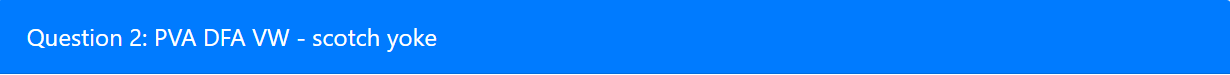
</div>
<div>
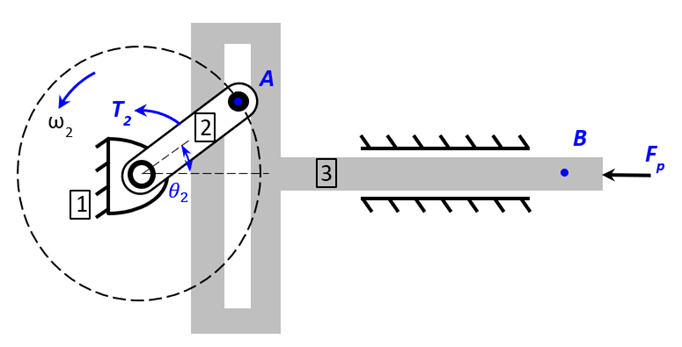
</div>
<div>
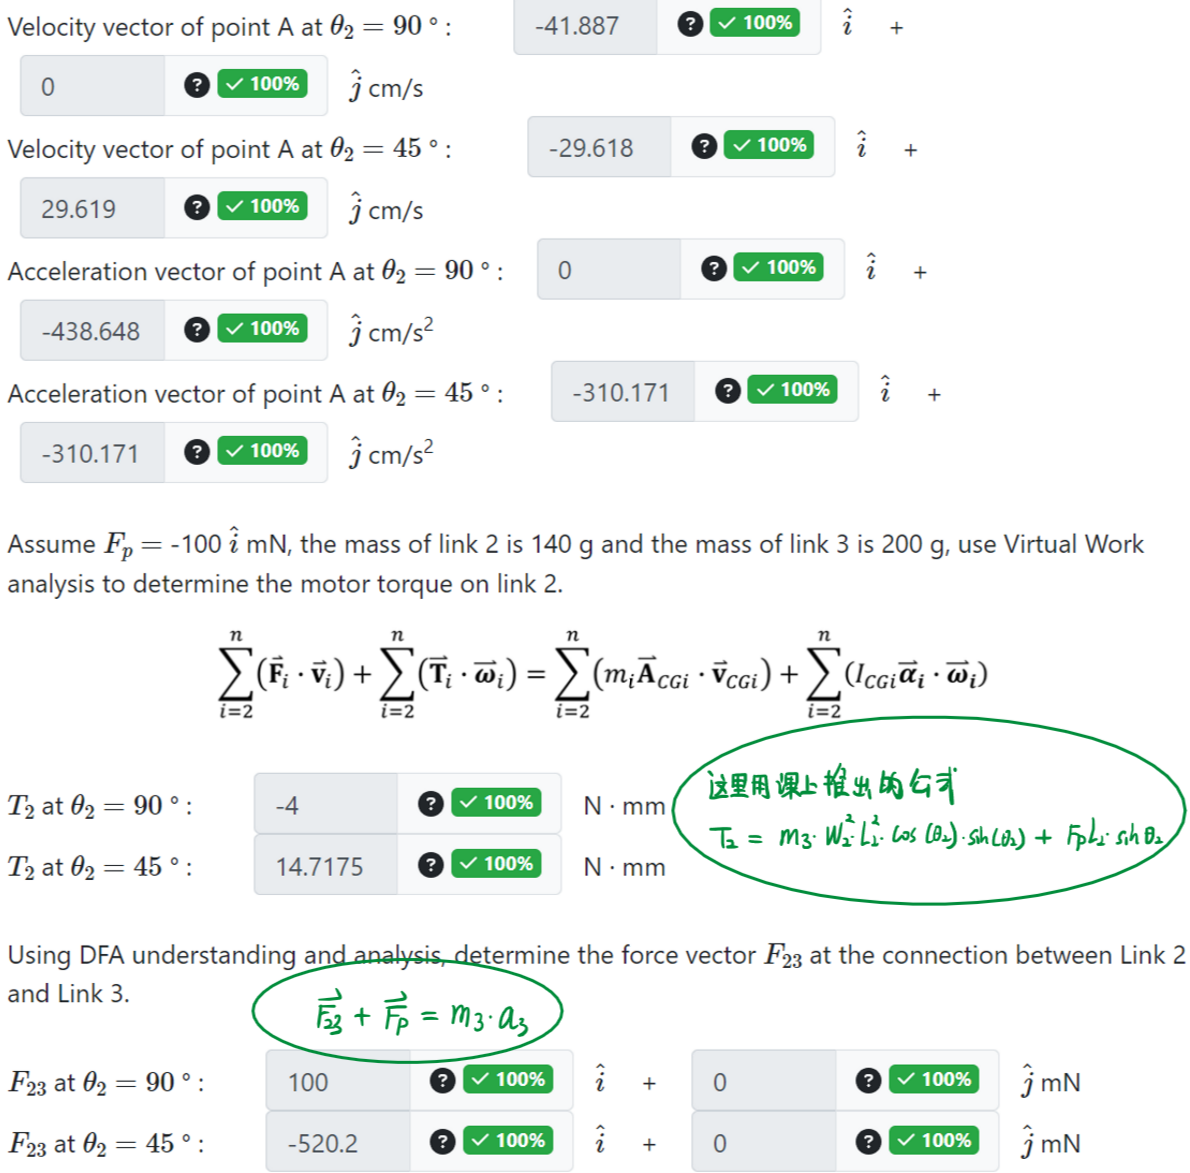
</div>

In [1]:
#from math import pi,sin,cos,tan,asin,acos,atan
import numpy as np
import sympy as sy
from sympy import S,pi,sin,cos,tan,asin,acos,atan,diff,integrate,solve
#from numpy import numpy.linalg.norm as norm

norm=np.linalg.norm
#norm(fp)

def d(x): #返还角度函数
    return x*pi/180
def trans(x):#将复数化为向量函数
    x=complex(x)
    a=int(x.real*1000+0.5)/1000
    b=int(x.imag*1000+0.5)/1000
    return np.array([a,b])

#####单位转化
cm=0.01
rpm=2*pi/60
g=0.001 #kg
mN=0.001

#####已知量
w2=100*rpm
l2=4*cm
fp=-100*mN
m2=140*g
m3=200*g

t=S('t')
sy.init_printing()
###############################################准备工作
for i in np.array([90,45]):
    theta2=d(i)
    
    position=(cos(w2*t)+sin(w2*t)*1j)*l2  #使用复数表达坐标
    velosity=diff(position,t,1)
    acc=diff(position,t,2)                #这里假设角加速度=0 所以直接求导两次
    
    position=position.subs(t,d(i)/w2)     #带入t的值计算 p.v.a
    velosity=velosity.subs(t,d(i)/w2)
    acc=acc.subs(t,d(i)/w2)
    
    T2=m3*w2**2*l2**2*cos(theta2)*sin(theta2)+fp*l2*sin(theta2)
    

    #print(trans(position)) 
    print(i,'°')
    print('Velocity=',trans(velosity)/cm)   
    print('Acceleration=',trans(acc)/cm)
    print('T2=',float(T2)*1000,"N·mm")
    print('F23x=',trans(acc)[0]*m3*1000-fp*1000,'F23y=0')
    print()

90 °
Velocity= [-41.8   0. ]
Acceleration= [   0.  -438.5]
T2= -4.0 N·mm
F23x= 100.0 F23y=0

45 °
Velocity= [-29.5  29.6]
Acceleration= [-310.1 -310.1]
T2= 14.717536254968227 N·mm
F23x= -520.2 F23y=0



<div>
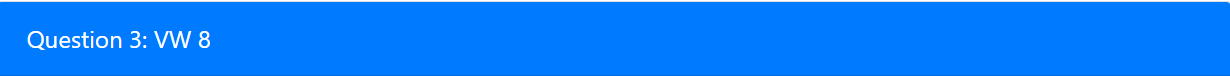
</div>
<div>
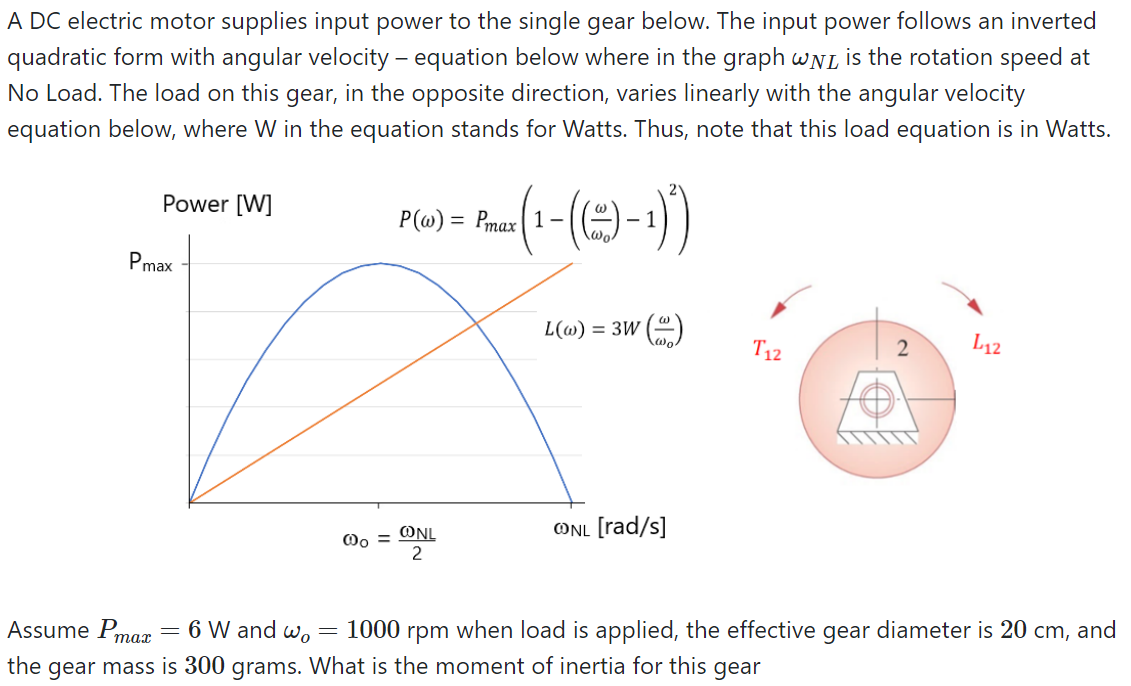
</div>
<div>
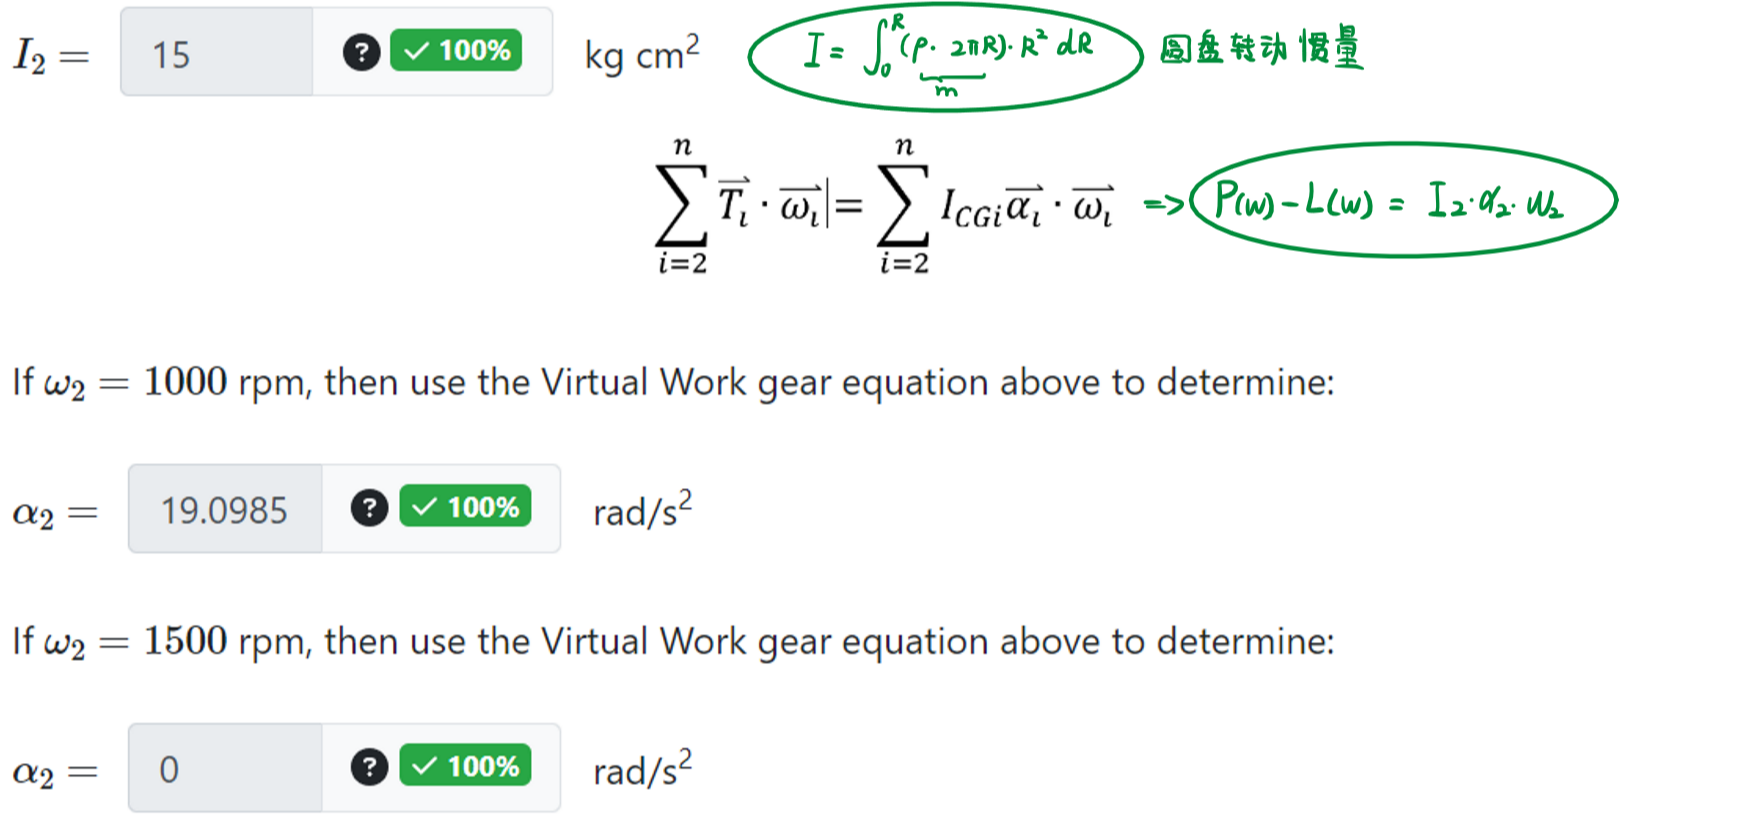
</div>

In [144]:
rpm=2*pi/60
W=1

Pmax=6*W
w0=1000*rpm
radius=10*cm
m_gear=300*g

w,alpha=S('w,alpha')

def I_disk(m,R):
    rho=m/(pi*R**2)
    r=S('r') 
    I=integrate(rho*2*pi*r*r**2,(r,0,R))
    return I

I2=I_disk(m_gear,radius)
print('I2=',I2)



equ1=Pmax*(1-(w/w0-1)**2)-3*w/w0

for w2 in [1000*rpm,1500*rpm]:
    Power=equ1.subs(w,w2)  
    equ2=Power-I2*alpha*w2
    print('alpha2=',solve(equ2)[0])


I2= 0.00150000000000000
alpha2= 19.0985931710274
alpha2= 0.0


<div>
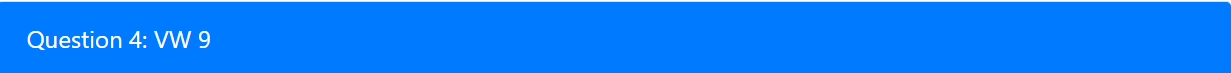
</div>
<div>
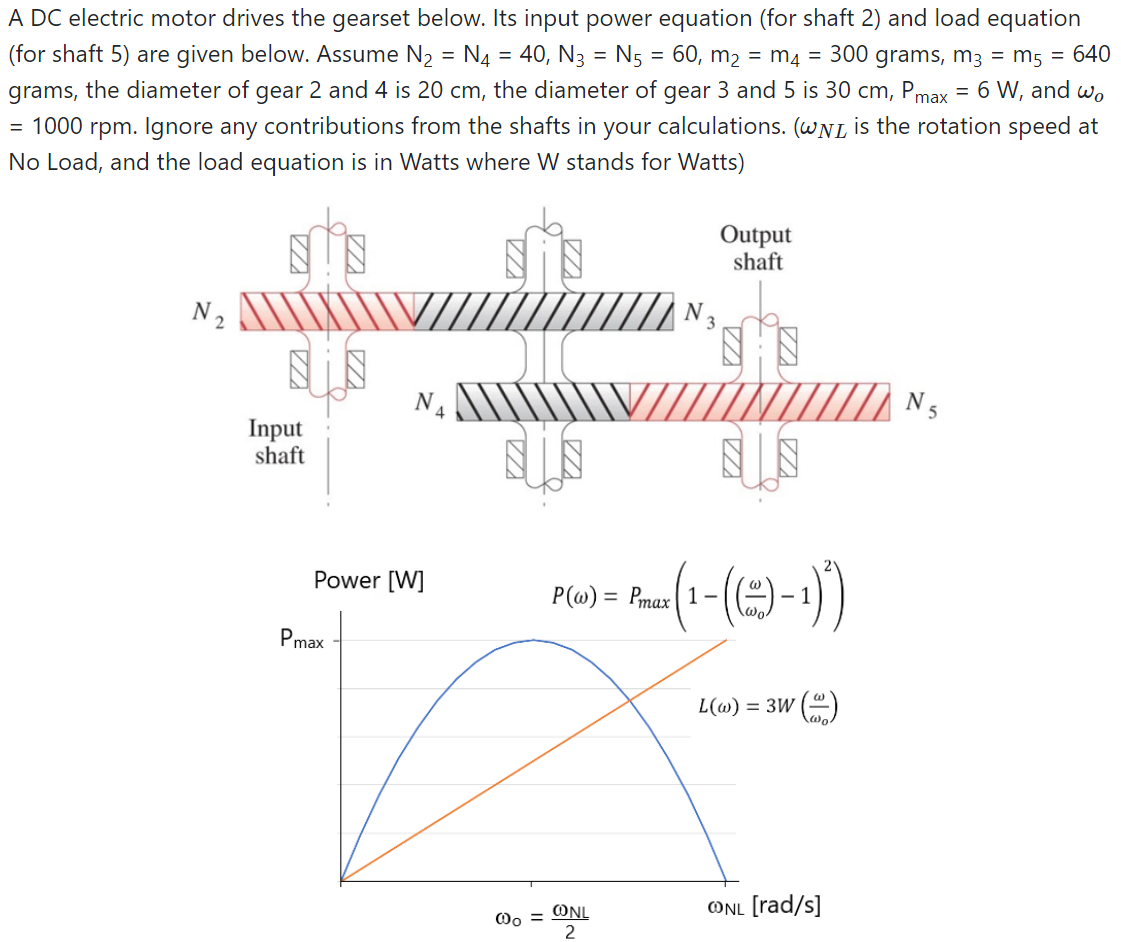
</div>
<div>
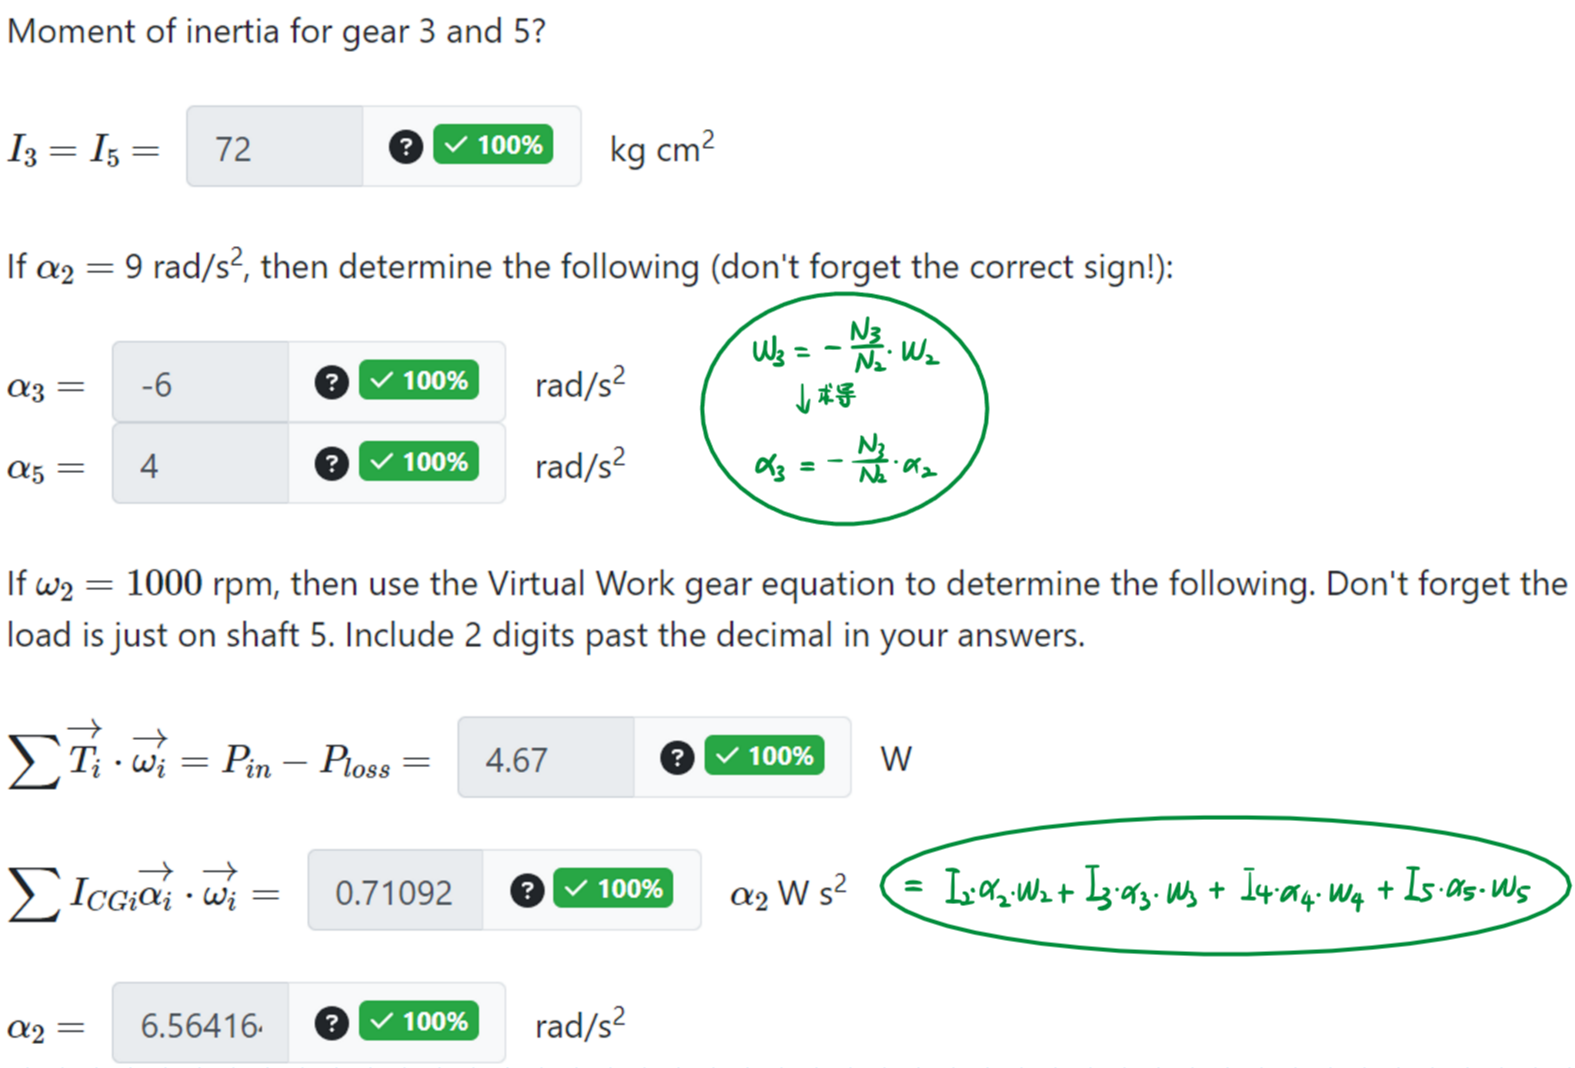
</div>

In [1]:
%reset -f
%clear

import sympy as sy
from sympy import S,pi,sin,cos,tan,asin,acos,atan,diff,integrate,solve

cm=0.01
rpm=2*pi/60
g=0.001 #kg
mN=0.001
W=1

N2=40
N4=40
N3=60
N5=60
m2=300*g
m4=m2
m3=640*g
m5=m3
d2=20*cm
d4=20*cm
d3=30*cm
d5=30*cm

Pmax=6*W
w0=1000*rpm

def I_disk(m,R):
    rho=m/(pi*R**2)
    r=S('r') 
    I=integrate(rho*2*pi*r*r**2,(r,0,R))
    return I

I2=I_disk(m2,d2/2)
I3=I_disk(m3,d3/2)
I4=I_disk(m4,d4/2)
I5=I_disk(m5,d5/2)

################################################################
alpha2=9
alpha3=-N2/N3*alpha2
alpha5=-N4/N5*alpha3

print('alpha3=',alpha3,'alpha5=',alpha5)

################################################################
w2=1000*rpm
a2=S('a2')
a3=-N2/N3*a2;w3=-N2/N3*w2
a4=a3;w4=w3
a5=-N4/N5*a4;w5=-N4/N5*w4

#Load在轴5上，所以L(w)要乘(2/3)**2
P=Pmax*(1-(w2/w0-1)**2)-3*w2/w0*(2/3)**2
IAW=(I2*a2*w2+I3*a3*w3+I4*a4*w4+I5*a5*w5)
equ=P-IAW

print('P=',P)
print('系数',float(0.226296*pi))
a2=solve(equ)[0]
print('alpha2=',a2)


alpha3= -6.0 alpha5= 4.0
P= 4.66666666666667
系数 0.7109298511367559
alpha2= 6.56416459233350
